### APIs often reffered to the third party services on respective servers to which developers purposefully connected to download or request those services from server to their (user's/developer's server, or  local program or worskpace) to incorcorate those services and APis to their program.

### for requesting those services & APIs from the server , we have request module in python , which is used for HTTP request to specified URL

### this request module takes web-url as a a argument and in returns gives us the several info of that web-page on specified url like jason format of that page along with there're several operations we can do that on web data on specified web url by methods like 
- GET:	GET method is used to retrieve information from the given server using a given URL.


- POST:	POST request method requests that a web server accepts the data enclosed in the body of the request message, most likely for storing it.

- PUT:	The PUT method requests that the enclosed entity be stored under the supplied URL. If the URL refers to an already existing resource, it is modified and if the URI does not point to an existing resource, then the server can create the resource with that URI.

- DELETE:	The DELETE method deletes the specified resource

- HEAD:	The HEAD method asks for a response identical to that of a GET request, but without the response body.

- PATCH:	It is used for modify capabilities. The PATCH request only needs to contain the changes to the resource, not the complete resource

### To play with web, Python Requests is must. Whether it be hitting APIs,downloading entire social media pages, and much more cool stuff, one will have to make a request to the URL.



### GIT description of prog: Here we are going to explore about how to use spotify api (as its required token -acess for authentication) for searching top tracks of artists by their name.

### Client credential flow diagram :

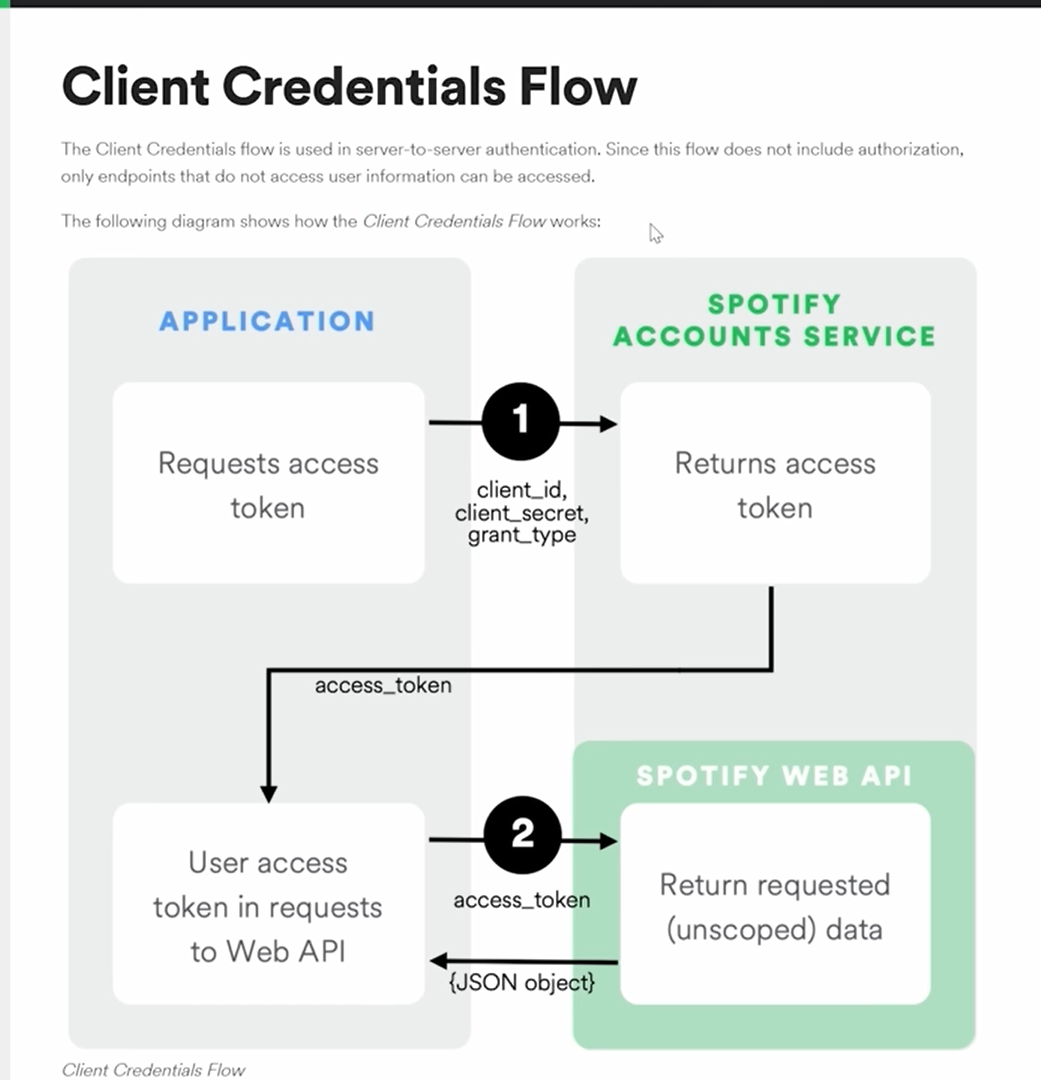

### Explanation:

- Here we can see the Application (here: our small program, this one) going to post request through python's request module 
- we're going to post request of acess-token with the the request-paramaeters consisiting of client-id , client secret [ all with prescribed request-parameters data-format] to the spotify account service(for auth.) [we can find documentation on 'spotify for developers' web-site and there on Dashboard we can create new-application while we're login with our spotify-account, and then we can find respetive client-id and client request for that spotify application , within application portal only] like this for example :
   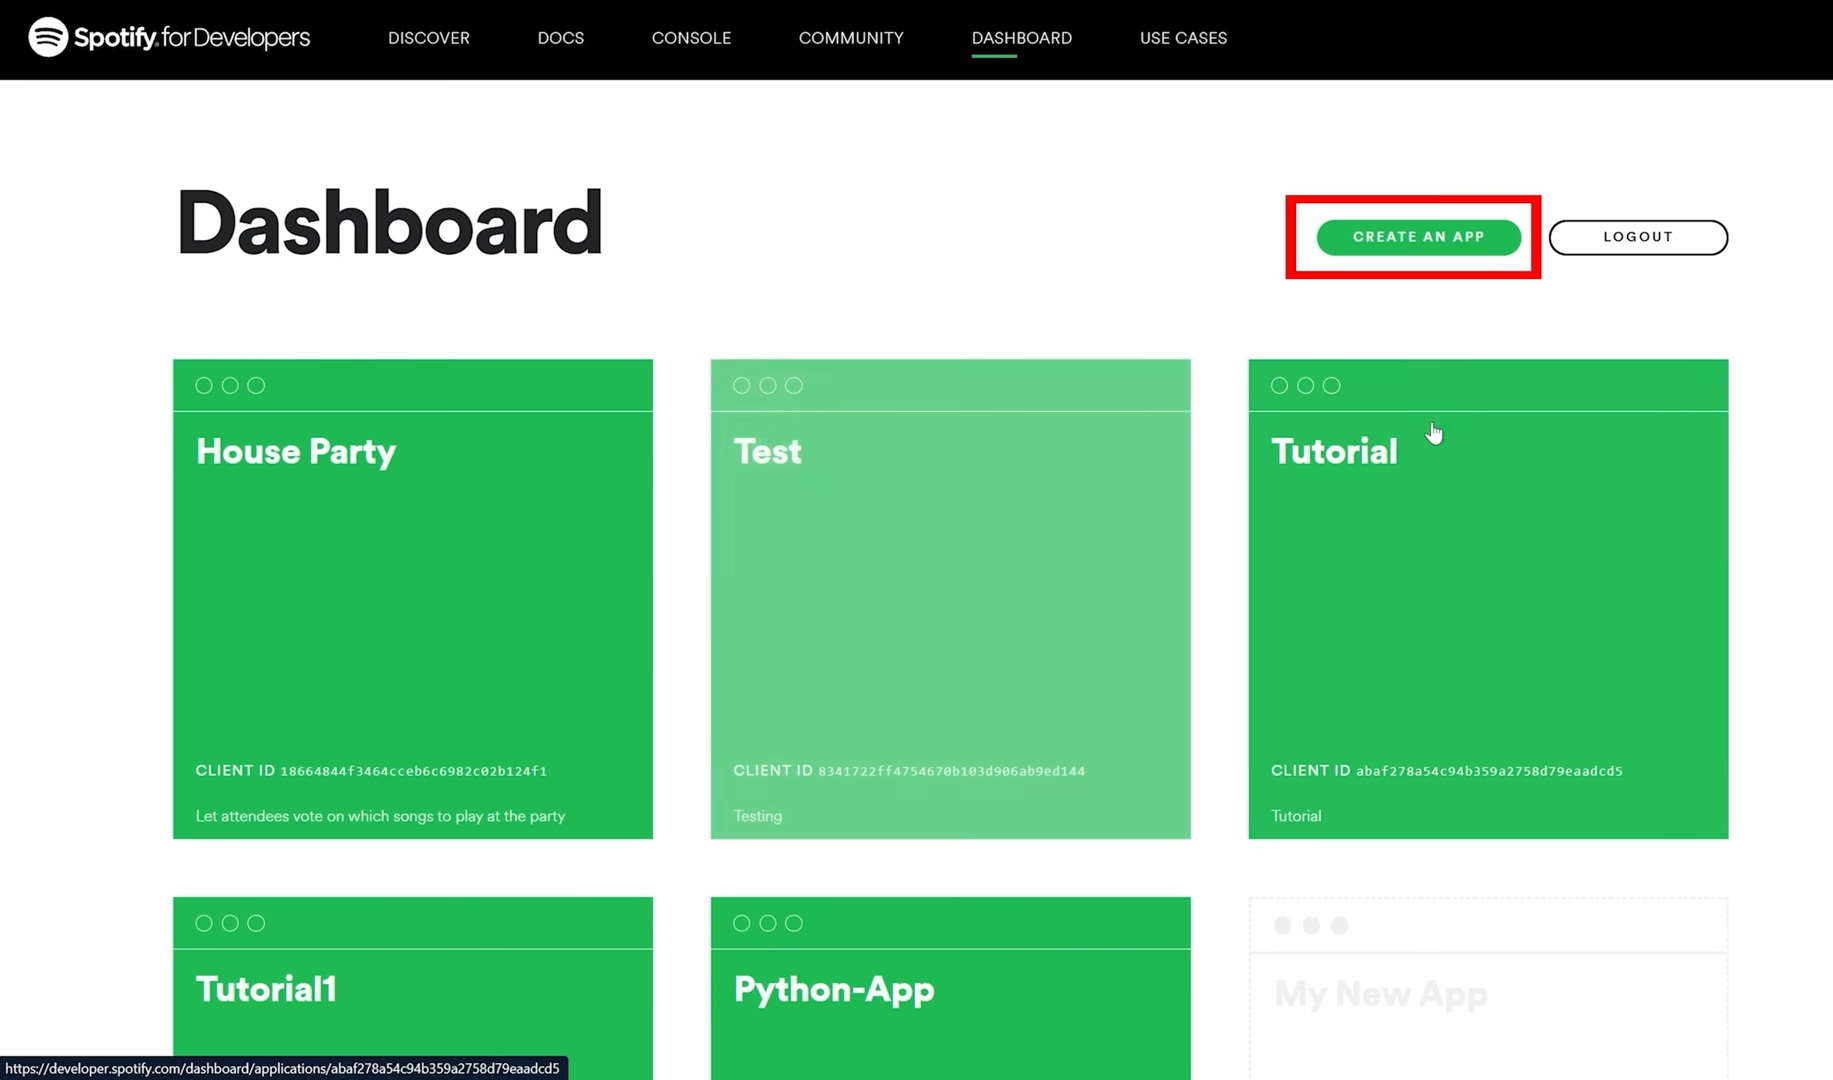
   
   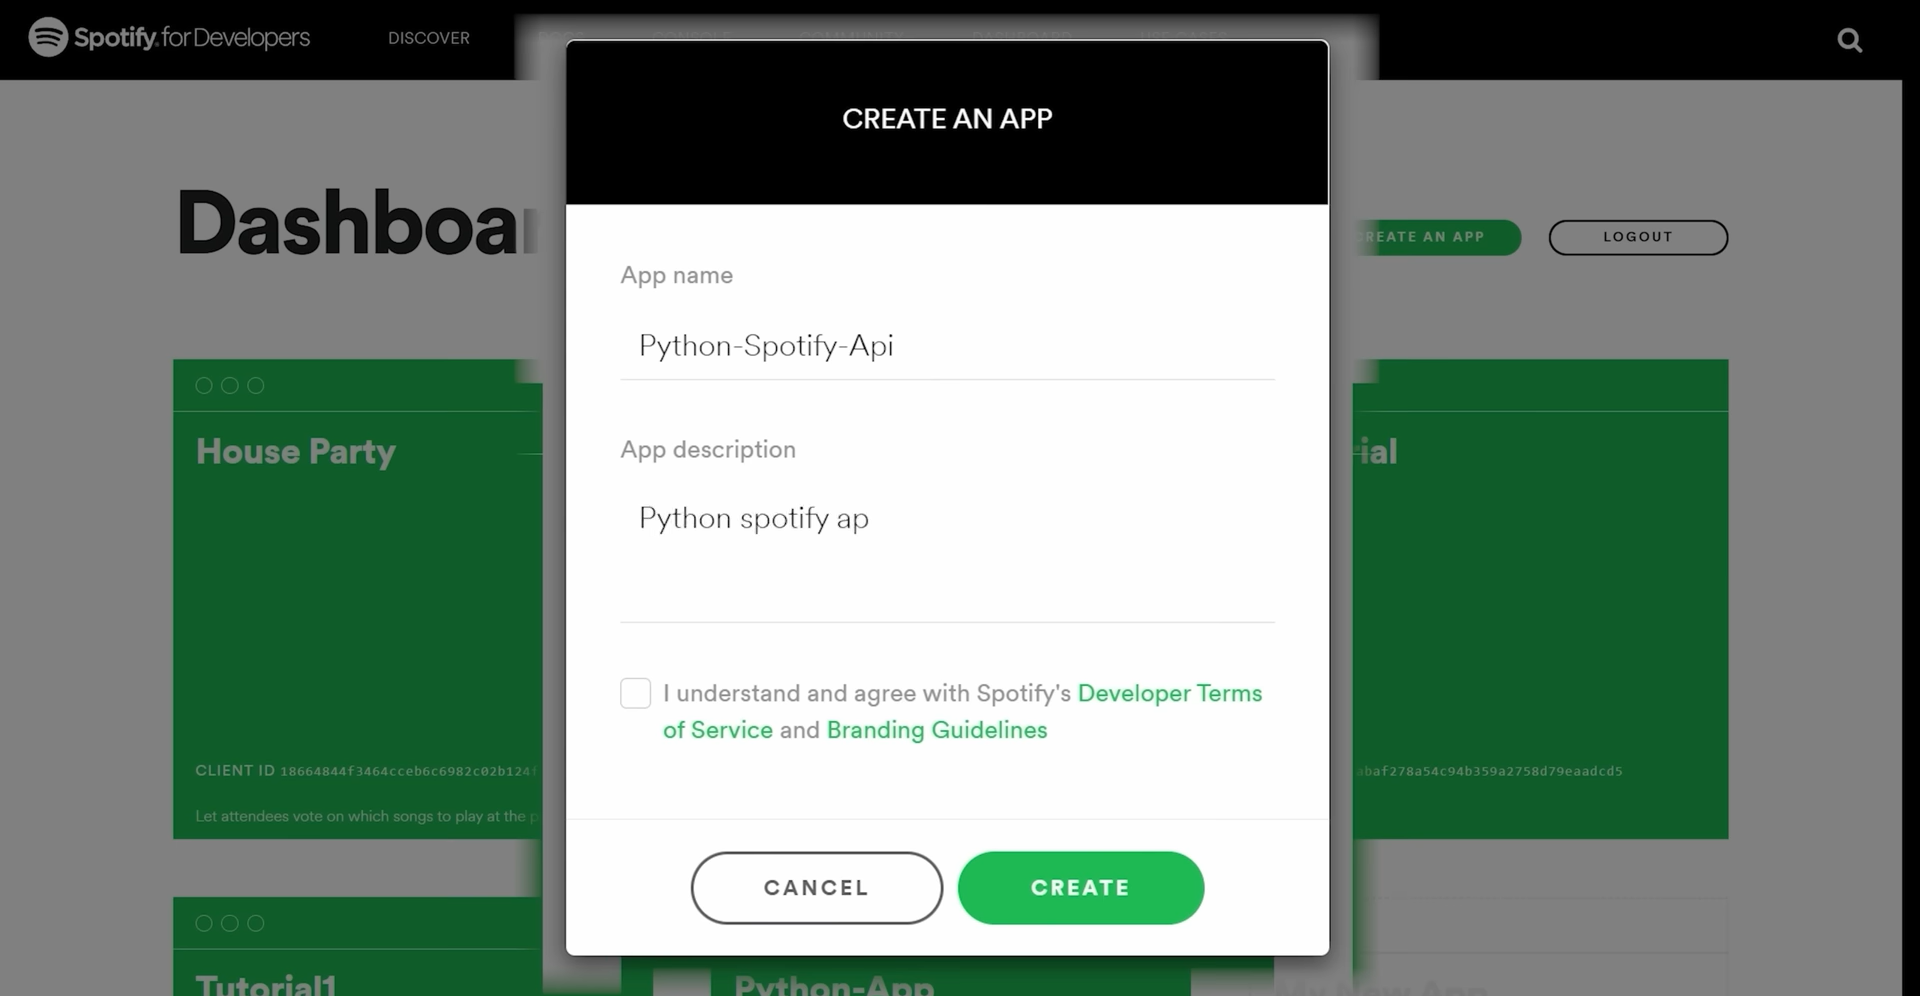

   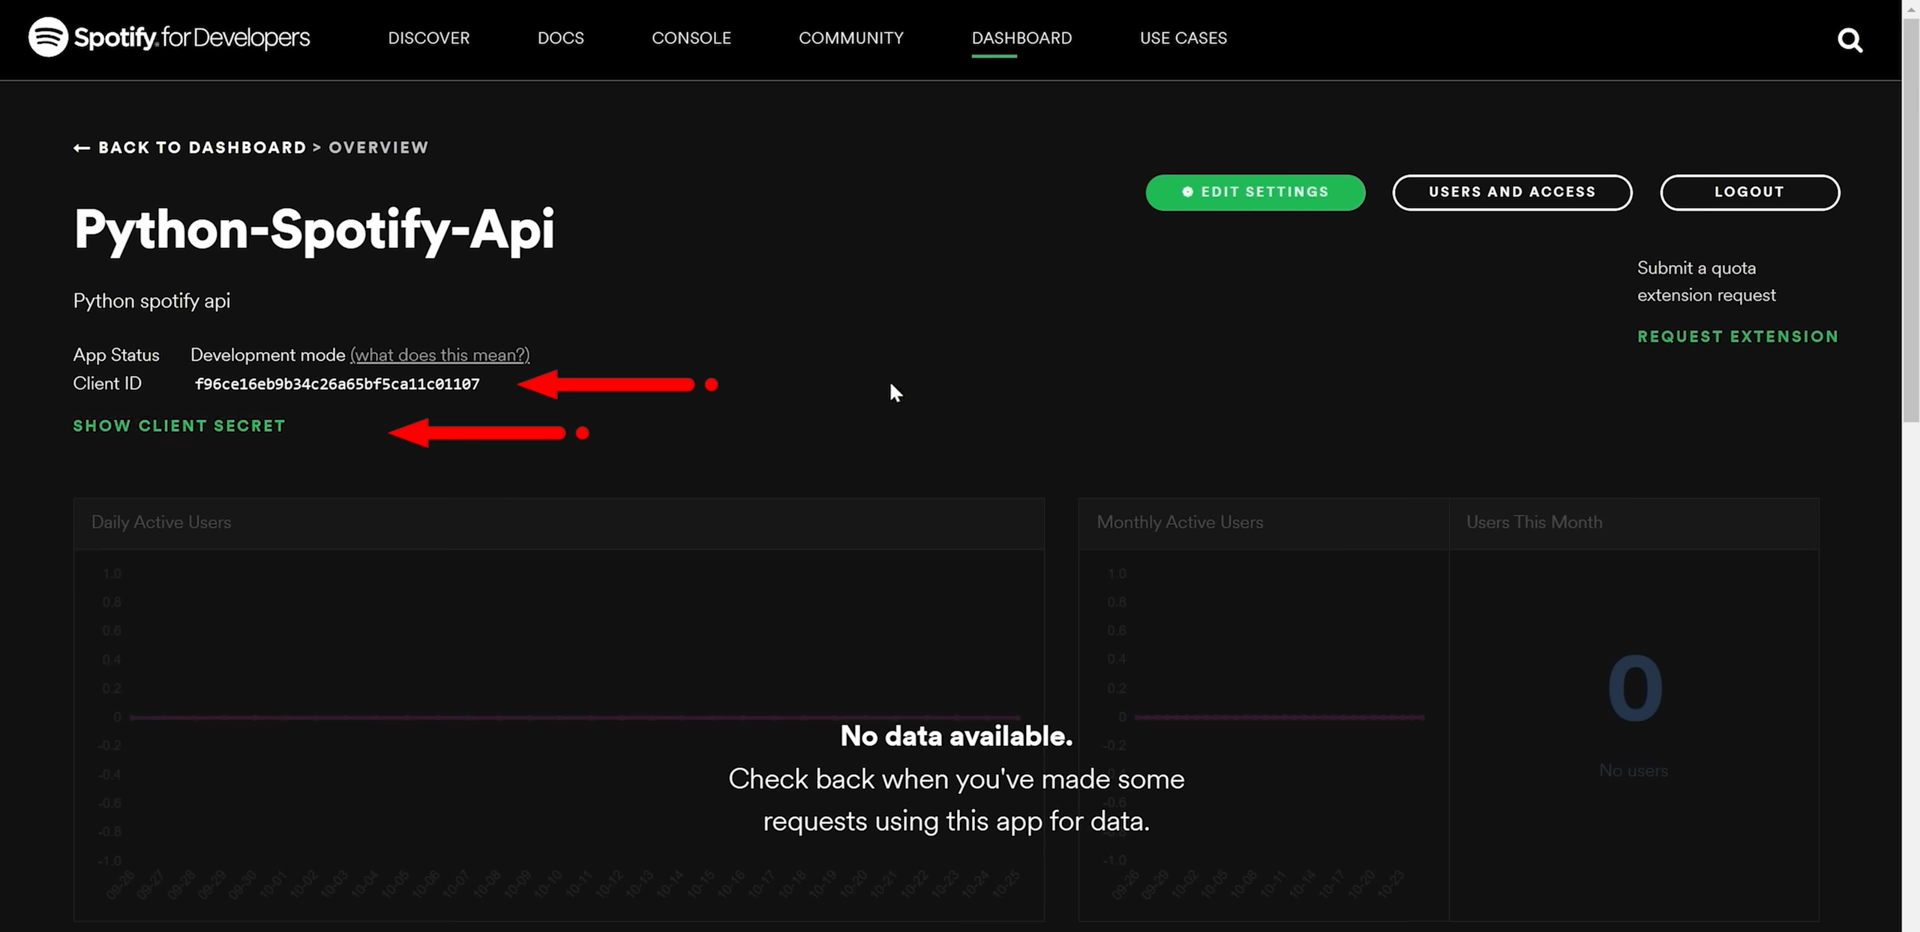

   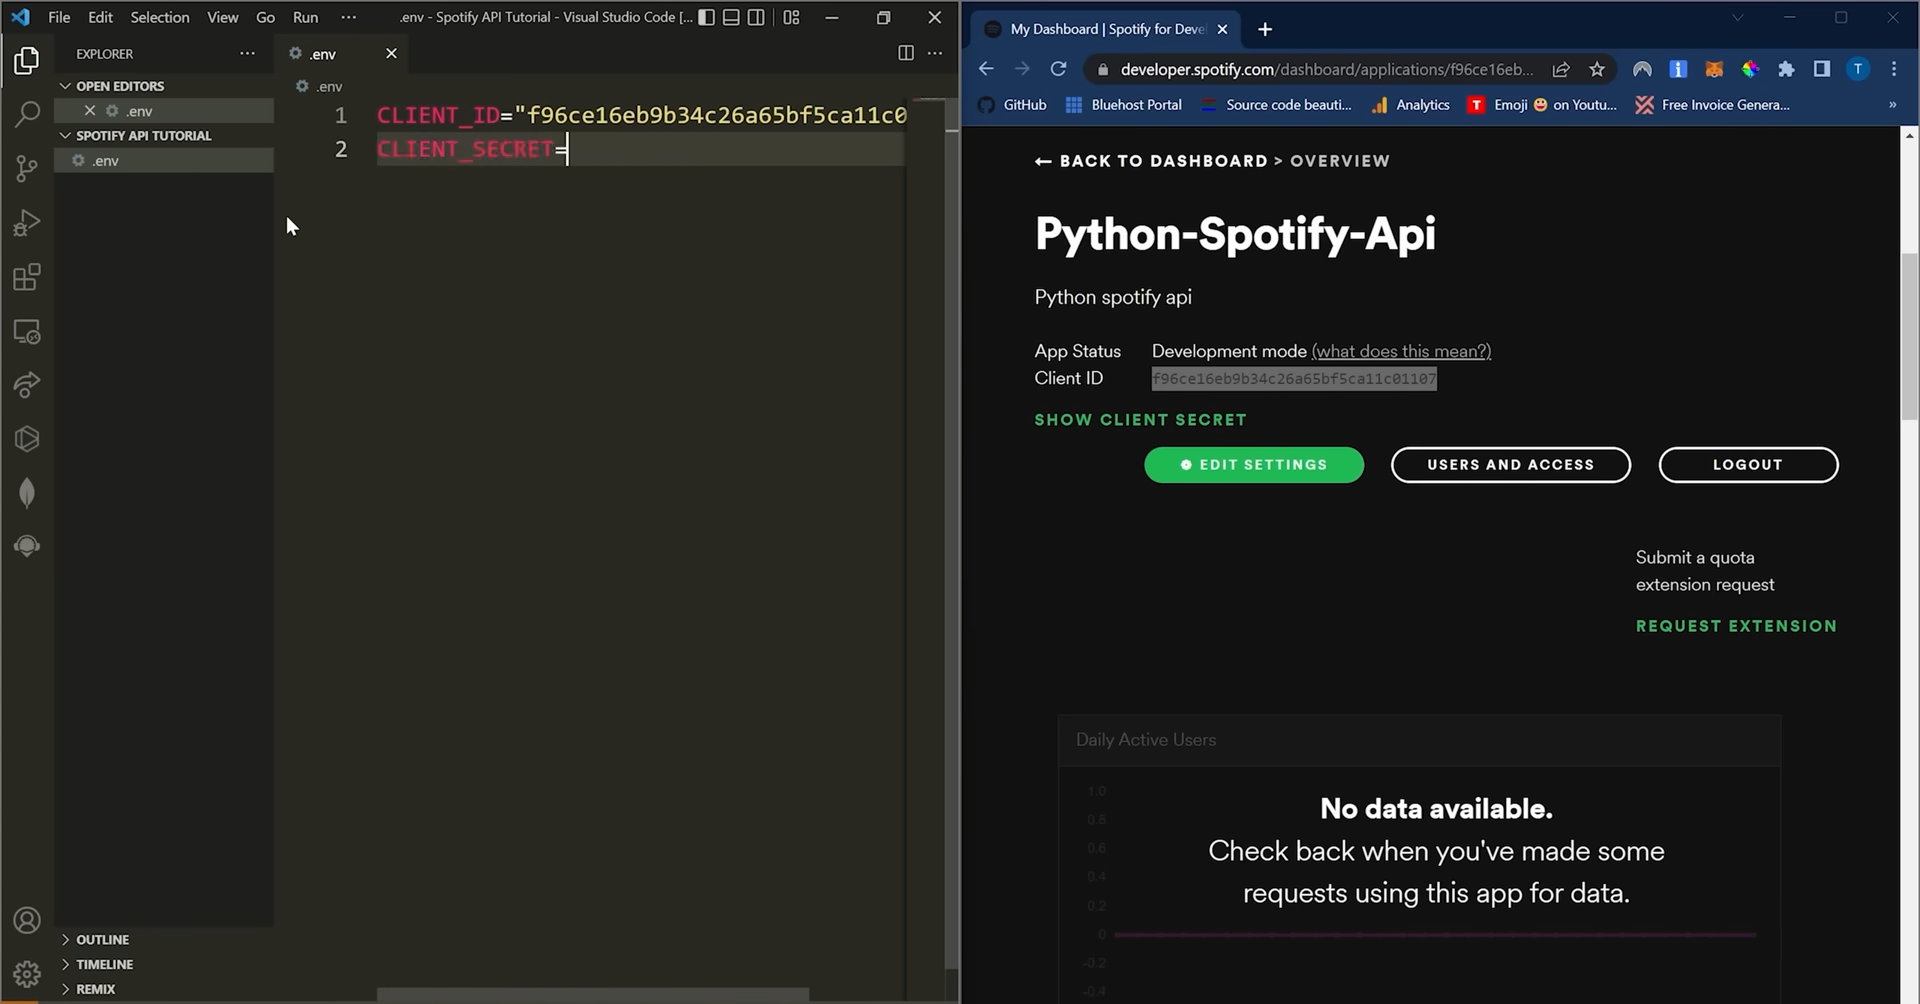

- then after sucessful posting request to the spotify accounts services(Auth-website) it will gives us the acess_token with expiry-date mentioned (in hours-seconds-format)

- with that acess-token of the search-Api of spotify-web then we can request for several search-request such as searcing tracks/albums by artist_name (or precisely by artist's id) ,all these requests will be satisfied by returning json objects to the client application(here : to our program , thisone). 

- optionally we can also request for refresh acess-token with old acess-token of api to the spotify-web

### This is prescibed format of request-parameters for posting request of acess-token to 'spotify account services'(auth.) [SS:P]

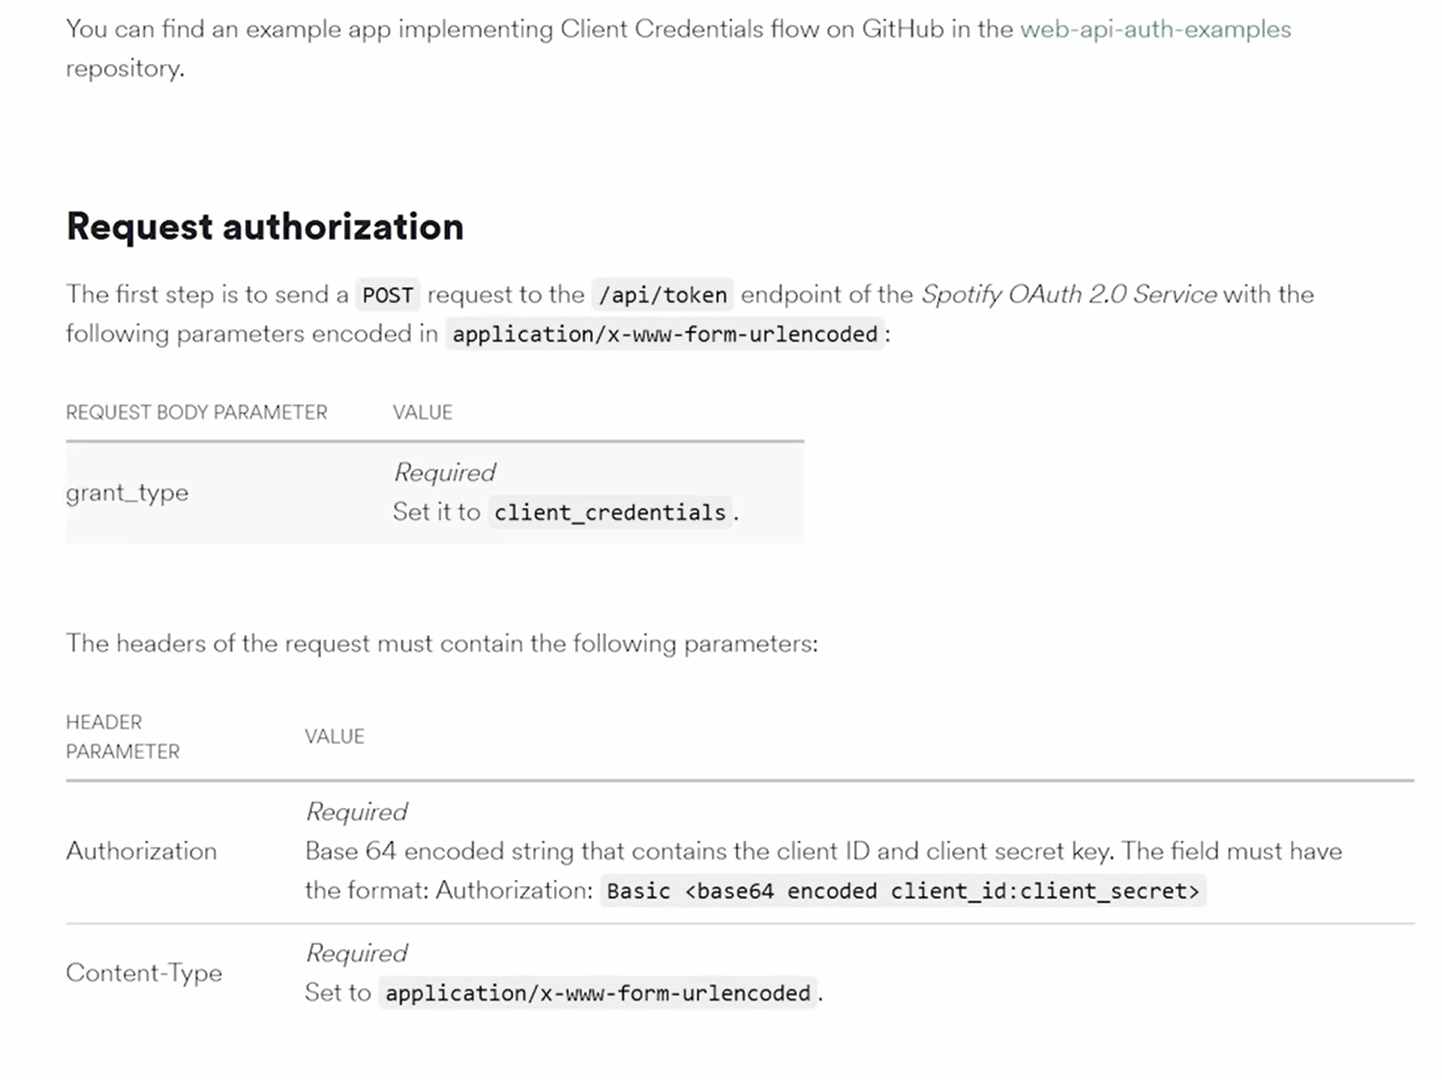

### and this is the acess-token(format) returned by 'spotify accounts services' to client application on sucessfully posting req: [SS:H]

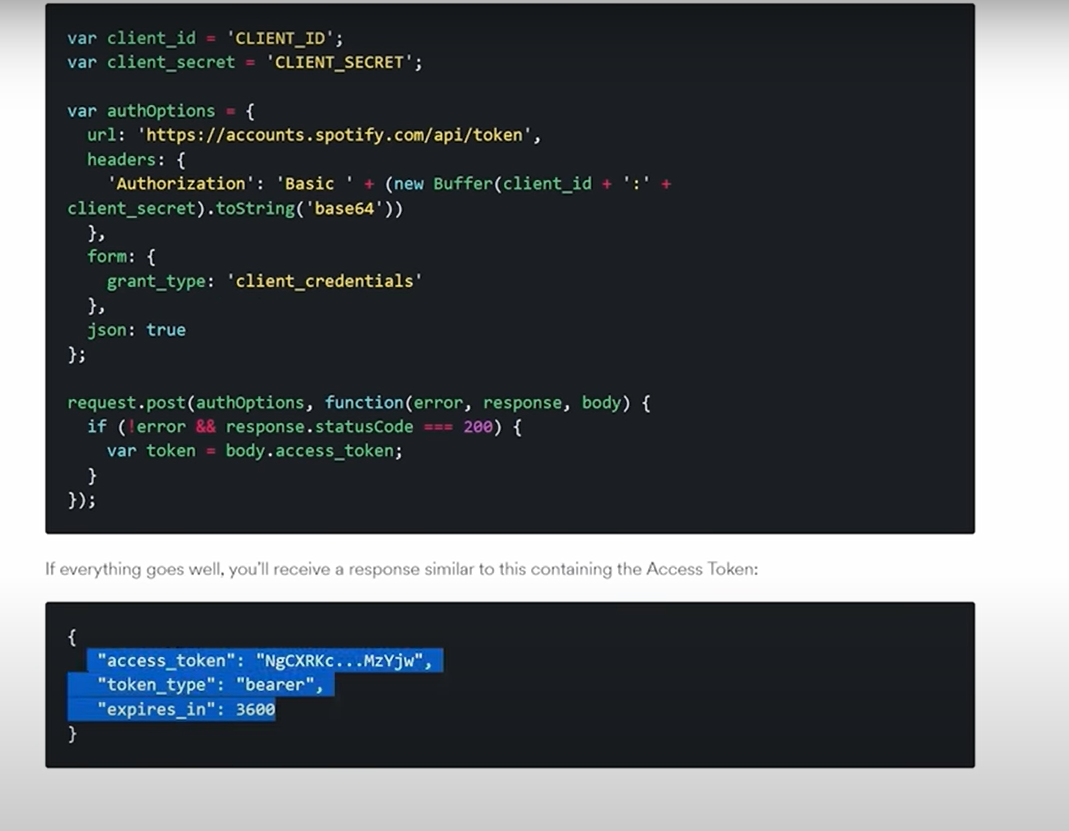


### dot-env file:
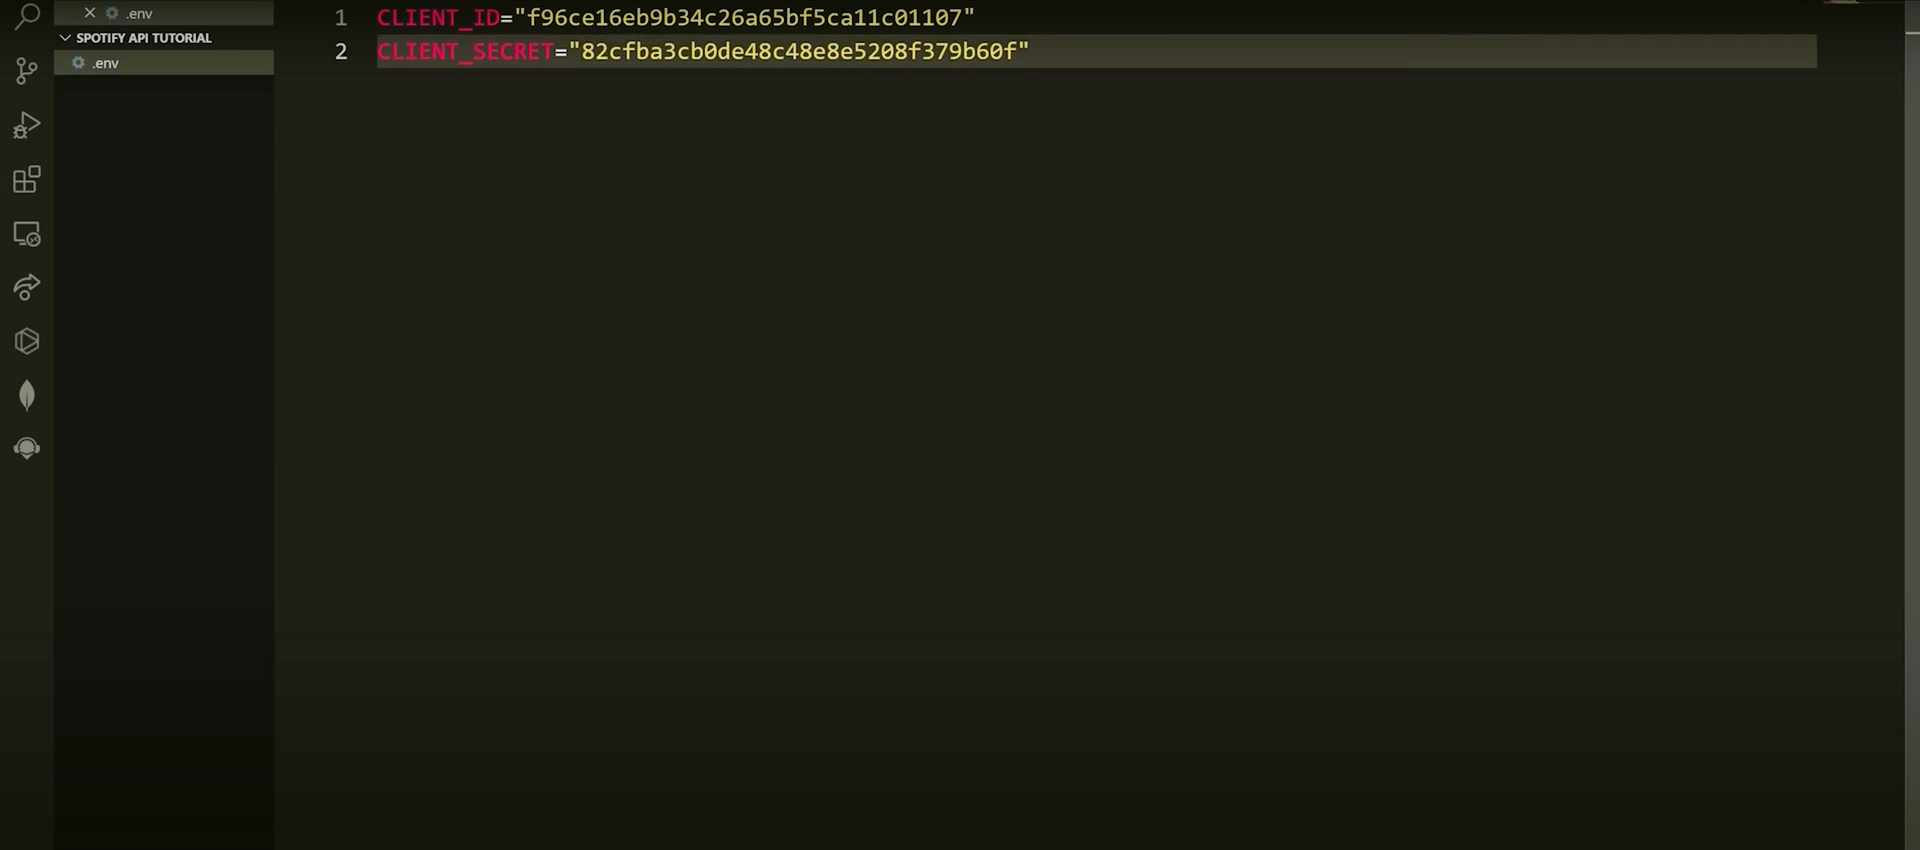

- here we made .env file where we're going to save our client-id and client-secret.
- [this client crendtials will be used to request acess-token of api]
- then we download 'dotenv' module of python with the help of that module we load the environment variables [here its client-id and client secrets] from .env-file to this program and fetch them to the suitable variables.
- we saved them to suitable variables that further used for posting request regarding acess-token with prescribed request parameters.


In [4]:
# here we're going to download dotenv module of python 
# through which environment variables in .env-files is to load in this program
# alongwith that going to download requests module of python as well.
!pip install python-dotenv
!pip install requests

   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------- 62.6/62.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/163.8 kB ? eta -:--:--
   ---------------------------------------- 163.8/163.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   ---------------------------------------- 100.4/100.4 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/61.6 kB ? eta -:--:--
   ---------------------------------------  61.4/61.6 kB ? eta -:--:--
   ---------------------------------------- 61.6/61.6 kB 827.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
   ------------------------------------- -- 112.6/121.1 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 121.1/121.1 kB 1.8 MB/s eta 0:00:00


In [6]:
# here we're impoting load_dotenv from dotenv module to load environment var from .env-file 
from dotenv import load_dotenv
import os
import base64 # this will be used to encode the authrisation string in to base64-code of 'utf-8' type 
# as that;s what prescribed by spotify platform here in documentation
from requests import post
import json

In [10]:
load_dotenv()  # this is how we call object of dotenv module to load env-var to this program.

#now going to fetch client-id and client secret to the suitable-named variable here in program.
client_id = os.getenv("CLIENT_ID")  # fetching client id from .env file using os-module's getenv-method (passing key; here its CLIENT_ID) and saving it to the suitable variable here.
client_secret = os.getenv("CLIENT_SECRET")  # fetching client-secret from .env file using os-module's getenv-method (passing key; here its CLIENT_SECRET) and saving it to the suitable variable here.

#print(client_id, client_secret)  # checking all is fine while fetching credentials by printing them respectively here.

def get_token():
    
    # here first we're going to build authrization string that will be used in header part of req.
    auth_string = client_id + ":" + client_secret   # shoulbe like 'client-id:client_secret' format for that we have to concanate here
    auth_bytes = auth_string.encode("utf-8") # first encoding to utf-8 type 
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8") # now further encode with base64 modules's b64encode-encoder of utf-8 type and then converted to string.
    
    #now we fetch base-url to the suitable url variable here (we can find based url of spotify for token in documentation)
    url = "https://accounts.spotify.com/api/token"
    
    # now preparing header for req: [as we can see the header format in screenshort above ref: 'ss:H']
    
    headers = {
        "Authorization": "Basic " + auth_base64,             # screenshot:[ref: SS:P]
        "Content-Type": "application/x-www-form-urlencoded"   # screenshot:[ref: SS:P]
    }
    
    # now preparing for request body parameter of gran type scrrenshot:[ref: SS:p]
    data = {"grant_type": "client_credentials"} 
    
    # now we're finally foing to post our request with base url , header[formatted as prescribed] and data[formatted as prescribed] and save it to result-var here.
    result = post(url = url, headers = headers, data = data)
    # then on successful posting of req data will be retrun in json format ,
    # that json formatted data we have to load in as python dictionary 
    json_result = json.loads(result.content)
    
    # now from that json_result [in form of python disctionary ] we have to fetch specifiaclly 'acess token' value by its key 
    token = json_result["access_token"]
    #expire = json_result["expires_in"]   # if we have to fetch the expiry time of that token
    
    # for this instance we going to return only token , that's essential for us rightnow
    return(token)
    
token = get_token()
print(f"so your Access token for spotify search API: {token}")

       


so your Access token for spotify search API: BQBdtOSkkWCdIlrCWWR-i6ZXC2945VuMHHBO0ne3pHEIh74gvdDIknrjM7dPdNt9Zko3Q4jIzieJAI3zwEb6-tNvTZZCTA3CLCTihj1MjwR4D0Zct5w
